In [51]:
#Importing basic packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
#from sklearn.externals import joblib

In [2]:
!pip install pandas_profiling

  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27090 sha256=d5ce11f30be87193f30b4ba61351e0c2b47c51dba969dd3832b119cec4571514
  Stored in directory: c:\users\smonda037\appdata\local\pip\cache\wheels\23\14\6e\4be5bfeeb027f4939a01764b48edd5996acf574b0913fe5243
  Created wheel for imagehash: filename=ImageHash-4.1.0-py2.py3-none-any.whl size=291996 sha256=e3bc32cd2f6f80661b19921c25a6f28aa40569dc1068daa63e865f5ed9e1ee9a
  Stored in directory: c:\users\smonda037\appdata\local\pip\cache\wheels\cc\57\bb\6f9f52a6d8187b8f806210e3378837aa4dc6219cd64cb99846
Successfully built htmlmin imagehash


In [3]:
#load data
data = pd.read_csv('diabetes.csv')

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
#EDA using Pandas Profiling
file = ProfileReport(data)
file.to_file(output_file='output.html')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


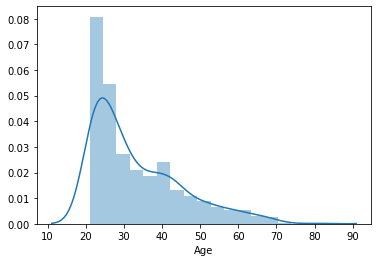

In [13]:
sns.distplot(data['Age'])


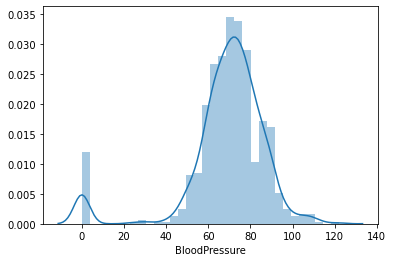

In [14]:
sns.distplot(data['BloodPressure'])

Shapiro-Wilk test of normality. The null hypothesis (Ho) is that the data is normal.

If The p-value is less than 0.001, implying that at 5% Level of Significance (LOS) we reject our null hypothesis (Ho). Therefore, the variable does not follow a normal distribution.

In [16]:

from scipy.stats import shapiro

stat, p = shapiro(data['BloodPressure'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.819, p=0.000


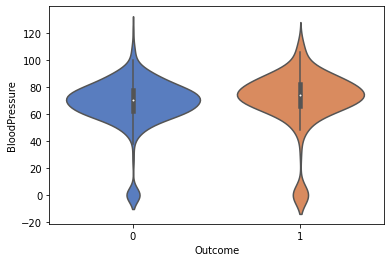

In [18]:
#Classifying the Blood Pressure based on class
ax = sns.violinplot(x='Outcome', y='BloodPressure', data=data, palette='muted', split=True)

We get the above graph. If we observe minutely, we can see that the box plot for 1 (Diabetic) inside the violin is a little more away from the horizontal axis than the box plot for 0 (Non Diabetic). It can be implied that diabetics seem to have a higher blood pressure than the non-diabetics.

In [20]:
data[data['Outcome']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
10,4,110,92,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0


In [21]:
#replace zeros with NANs
data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [ ]:
#function to impute the missing values with median based on Outcome class
def impute_median(data, var):
    

In [23]:
temp = data[data['Glucose'].notnull()]
temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [33]:
a = temp[['Glucose', 'Outcome']].groupby(['Outcome']).median()
a.head(10)

,Glucose
Outcome,
0,107.0
1,140.0


In [35]:
data.loc[(data['Outcome'] == 0 ) & (data['Glucose'].isnull()), 'Glucose'] = temp.loc[0 ,'Glucose']

75    NaN
182   NaN
342   NaN
Name: Glucose, dtype: float64

In [36]:
#function to impute the missing values with median based on Outcome class
def impute_median(data, var):
    temp = data[data[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median()
    data.loc[(data['Outcome'] == 0 ) & (data[var].isnull()), var] = temp.loc[0 ,var]
    data.loc[(data['Outcome'] == 1 ) & (data[var].isnull()), var] = temp.loc[1 ,var]
    return data

In [38]:
#impute values using the function
data = impute_median(data, 'Glucose')
data = impute_median(data, 'BloodPressure')
data = impute_median(data, 'SkinThickness')
data = impute_median(data, 'Insulin')
data = impute_median(data, 'BMI')

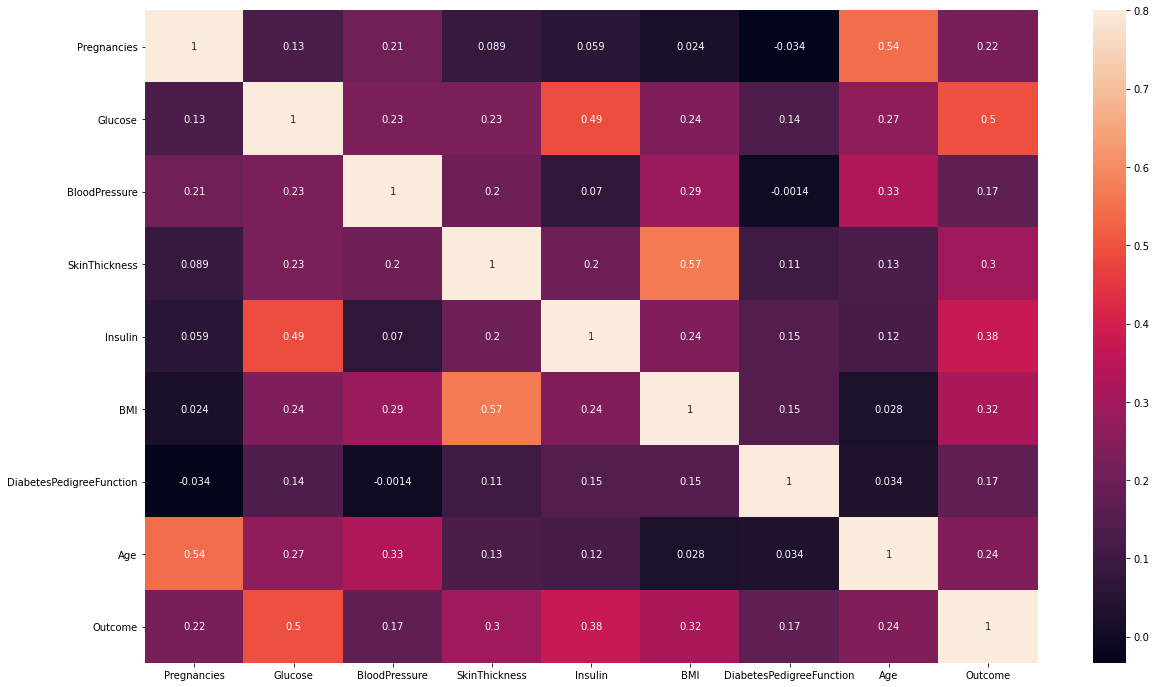

In [40]:
corr_matrix = data.corr()

f,ax = plt.subplots(figsize=(20,12))

sns.heatmap(corr_matrix,vmax=0.8, annot=True)

In [42]:
#separate features and target as x & y

y = data['Outcome']
x = data.drop('Outcome', axis = 1)
columns = x.columns
columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [68]:
#scale the values using a StandardScaler
scaler = StandardScaler()
scaler =  scaler.fit(x)

filename = 'scaler.joblib'
joblib.dump(scaler, filename)

X= scaler.transform(x)

#features DataFrame
features = pd.DataFrame(X, columns = columns)

In [69]:
features

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.864625,-0.032180,0.665181,0.311604,0.169483,0.468492,1.425995
1,-0.844885,-1.204727,-0.528124,-0.010112,-0.440843,-0.848549,-0.365061,-0.190672
2,1.233880,2.014265,-0.693438,0.327535,0.311604,-1.328478,0.604397,-0.105584
3,-0.844885,-1.073339,-0.528124,-0.685405,-0.536303,-0.630399,-0.920763,-1.041549
4,-1.141852,0.503310,-2.677212,0.665181,0.294758,1.551096,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.679177,0.298449,2.128317,0.429525,0.067679,-0.908682,2.532136
764,-0.547919,0.010607,-0.197495,-0.235210,-0.440843,0.634868,-0.398282,-0.531023
765,0.342981,-0.022240,-0.032180,-0.685405,-0.334153,-0.906722,-0.685193,-0.275760
766,-0.844885,0.141994,-1.024067,0.327535,0.311604,-0.339533,-0.371101,1.170732


In [67]:
#split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(features, y, test_size = 0.2, random_state = 42)

#define the model
model = RandomForestClassifier(n_estimators=300, bootstrap = True, max_features = 'sqrt')

#fit model to training data
model.fit(x_train, y_train)

filename = 'finalized_model.joblib'
joblib.dump(model, filename)


# load the model from disk
loaded_model = joblib.load(filename)
#predict on test data
y_pred = loaded_model.predict(x_test)

#evaluate performance
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90        99
           1       0.80      0.85      0.82        55

    accuracy                           0.87       154
   macro avg       0.86      0.87      0.86       154
weighted avg       0.87      0.87      0.87       154



In [56]:
#inference input data
'''
feat_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
row = [pregnancies, glucose, bloodpressure, skinthickness, insulin, bmi, dpf, age]

#transform the inference data same as training data
df = pd.DataFrame([row], columns = feat_cols)
X = scaler.transform(df)
features = pd.DataFrame(X, columns = feat_cols)
'''

#make predictions using the already built model [0: healthy, 1:diabetes]
if (model.predict(features)==0):
    return "This is a healthy person!"
else: 
    return "This person has high chances of having diabetes!"

SyntaxError: 'return' outside function (<ipython-input-56-73f0f1082832>, line 14)

In [58]:
!pip install streamlit

  Created wheel for blinker: filename=blinker-1.4-py3-none-any.whl size=13455 sha256=99ac488e999449bc1b47ac524e380d99b4eb72b946be4db7498f70181ed6c2f2
  Stored in directory: c:\users\smonda037\appdata\local\pip\cache\wheels\b7\a5\68\fe632054a5eadd531c7a49d740c50eb6adfbeca822b4eab8d4
Successfully built blinker
